KISHORE AV 
CB.EN.U4CSE20231
Q7

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('melbourne_housing.csv')

In [3]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/2017,16.7,3150,...,2,2.0,652,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/2017,6.8,3016,...,2,2.0,333,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,3016,...,2,4.0,436,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,3016,...,1,5.0,866,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380


In [4]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [20]:
df = df.dropna(axis=1)

In [21]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [22]:
df.dtypes

Suburb             int32
Address            int32
Rooms              int64
Type               int32
Price              int64
Method             int32
SellerG            int32
Date               int32
Distance         float64
Postcode           int64
Bedroom2           int64
Bathroom           int64
Landsize           int64
CouncilArea        int32
Lattitude        float64
Longtitude       float64
Regionname         int32
Propertycount      int64
dtype: object

<AxesSubplot: ylabel='Frequency'>

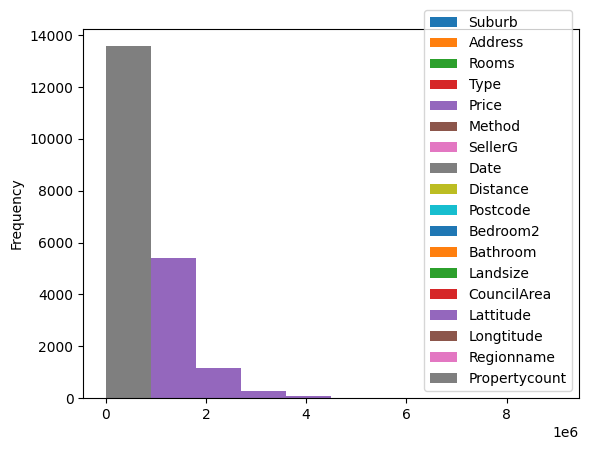

In [23]:
df.plot.hist()

In [24]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for i in df.columns:
  if df.dtypes[i]=='O':
    df[i] = enc.fit_transform(df[i])

    print(f'{i} : {df[i].unique()}')

In [25]:
X = df.drop(['Price'], axis= 1)
y = df['Price']

In [26]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20,train_size=0.8)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [30]:
linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)

LinearRegression()

In [32]:
knnmodel = KNeighborsRegressor()
knnmodel.fit(X_train,y_train)

KNeighborsRegressor()

In [34]:
linearPred = linearmodel.predict(X_test)
knnPred = knnmodel.predict(X_test)

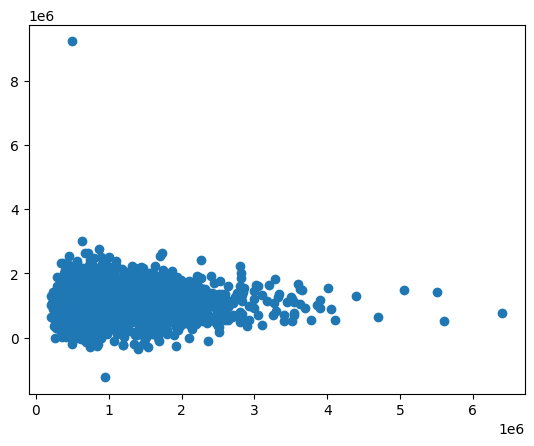

In [36]:
import matplotlib.pyplot as plt
plt.scatter(y_test,linearPred)

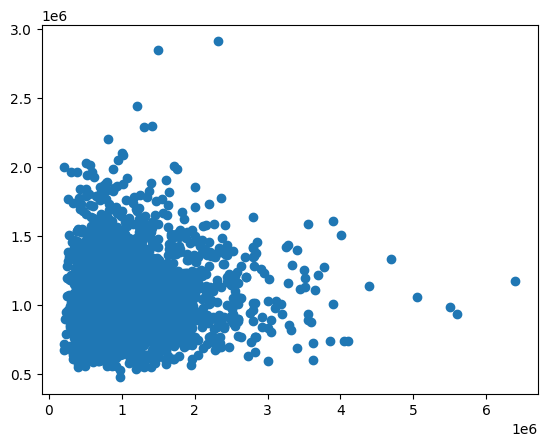

In [37]:
plt.scatter(y_test,knnPred)

In [40]:
from sklearn import metrics
mae = metrics.mean_absolute_error( linearPred,y_test)
mse = metrics.mean_squared_error(linearPred,y_test)
rmse = np.sqrt(mse)   
r2 = metrics.r2_score(linearPred,y_test)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 600082.3144040438
MSE: 652746923835.8127
RMSE: 807927.5486303291
R-Squared: -1.5963041826862656


***Using KNN***

In [39]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, knnPred)
mse = metrics.mean_squared_error(y_test, knnPred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, knnPred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 500585.3121502209
MSE: 464575898909.4256
RMSE: 681598.0479061143
R-Squared: -0.17565326311986418


KNN model produces a better score than the linear model in every metric